In [1]:
import pandas as pd 
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def plot_corr(corr,size=10):

   # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax,  aspect=40, shrink=.8)

In [3]:
df_mean = pd.read_csv('KMean-Cluster.csv' , index_col = 'Symbol')
number_clusters = df_mean['Cluster'].unique()
df_mean.head()

,Cluster
Symbol,
GRMN,0
BBY,0
NWL,0
BAC,0
HUM,0


In [4]:
df_corr  = pd.read_csv('symbols-correlation-clusters.csv', index_col = 'Symbol')
df_corr.head()

,ITW,NVDA,NUE,DOV,NTRS,NTAP,NSC,DXC,NCLH,MXIM,...,ES,CMS,AMT,WELL,WEC,SO,CME,LW,CBOE,Cluster
Symbol,,,,,,,,,,,,,,,,,,,,,
ITW,0,112,98,128,108,106,104,100,126,108,...,-22,-44,-30,-22,-32,-40,-6,-10,-22,3
NVDA,112,0,94,104,68,92,68,80,100,114,...,-26,-40,-10,-34,-28,-40,-38,8,-30,1
NUE,98,94,0,116,106,80,100,90,84,84,...,-24,-44,-62,-36,-38,-46,-16,14,-38,2
DOV,128,104,116,0,108,84,96,76,90,116,...,-10,-28,-30,-22,-26,-20,2,14,-30,1
NTRS,108,68,106,108,0,76,88,62,82,70,...,-24,-30,-58,-46,-40,-30,0,-4,-24,4


In [18]:

def test_k_mean_correlations(df_mean, df_corr, cluster) : 

    cluster_symbols = df_mean[df_mean['Cluster'] == cluster].index
    print(len(cluster_symbols))
    
    all_correlations = []
    for symbol in cluster_symbols:
        symbol_corr = df_corr.loc[symbol] 
        
        correlation = []
        for symbol in cluster_symbols:
            corr = symbol_corr[symbol]
            correlation.append(corr)

        all_correlations.append(correlation)


    df_ = pd.DataFrame(all_correlations, columns = cluster_symbols , index = cluster_symbols) 
    return df_


57


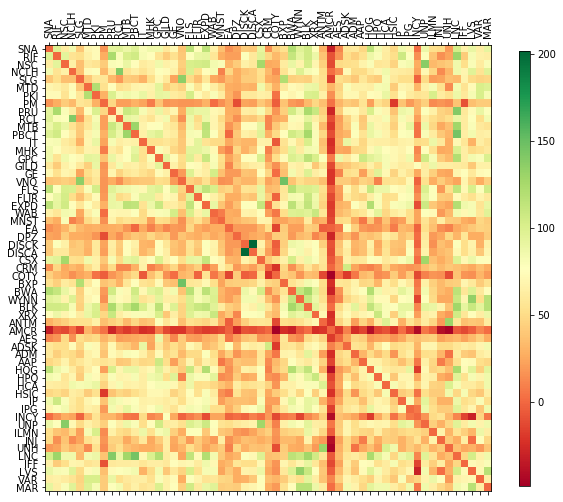

In [21]:
df_ = test_k_mean_correlations(df_mean, df_corr,5)
plot_corr(df_, size=10)